In [1]:
import pandas as pd

df=pd.read_csv("train-HR.csv")
df.index = df.EmployeeNumber
df.head()
print("Shape: ", df.shape)
#df.columns

Shape:  (1322, 32)


In [2]:
predictor = df[['Age', 'Gender', 'Department', 'JobRole', 'JobLevel',
       'JobSatisfaction', 'JobInvolvement', 'PerformanceRating', 'OverTime',
       'EnvironmentSatisfaction', 'EducationField', 'Education',
       'BusinessTravel', 'WorkLifeBalance', 'MaritalStatus',
       'RelationshipSatisfaction', 'DistanceFromHome', 'StockOptionLevel',
       'NumCompaniesWorked', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'DailyRate', 'HourlyRate', 'MonthlyIncome',
       'MonthlyRate', 'PercentSalaryHike']]

target = df['Attrition']

In [3]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(predictor, target,test_size=0.2,random_state=0)
print("Shape of training data: ",train_x.shape)
print("Shape of test data: ",train_y.shape)

Shape of training data:  (1057, 30)
Shape of test data:  (1057,)


In [4]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn import svm

In [5]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
clf = Pipeline(steps=[('scalar', StandardScaler()),
                      ('classifier', svm.SVC(kernel='poly'))])
clf.fit(train_x,train_y)
predictions = clf.predict(train_x)
predict_test  = clf.predict(test_x)

print('RMSE on train data: ')
print(np.sqrt(np.mean(predictions- train_y)**2))
print('RMSE on test data: ')
print(np.sqrt(np.mean(predict_test- test_y)**2))


RMSE on train data: 
0.06149479659413434
RMSE on test data: 
0.14339622641509434


In [6]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

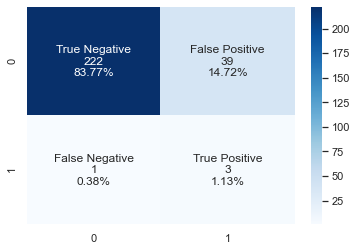

In [7]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
sns.set()

cf_matrix = confusion_matrix(predict_test, test_y)

group_names = ['True Negative','False Positive','False Negative','True Positive']
group_counts = ['{0:0.0f}'.format(value) for value in
                cf_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [8]:
# For the training model

# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_y, predict_test))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_y, predict_test, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_y, predict_test, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_y, predict_test, average=None)[0])

Accuracy:  0.8490566037735849
Recall:  0.9955156950672646
Precision:  0.8505747126436781
F1 score:  0.9173553719008264


In [9]:
test_df=pd.read_csv("test-HR.csv")
test_df.index = test_df.EmployeeNumber
print("Shape",test_df.shape)
test_df.head()

test_predictor = test_df.drop(['EmployeeNumber','Attrition'],1)
test_target = test_df.Attrition
test_predictor

Shape (148, 32)


,Age,Gender,Department,JobRole,JobLevel,JobSatisfaction,JobInvolvement,PerformanceRating,OverTime,EnvironmentSatisfaction,...,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,DailyRate,HourlyRate,MonthlyIncome,MonthlyRate,PercentSalaryHike
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
1857,46,1,2,5,3,4,3,3,0,4,...,4,9,8,4,7,706,82,8578,19989,14
1858,28,1,1,2,1,4,3,3,0,3,...,2,3,2,2,2,280,43,2706,10494,15
1859,29,1,2,1,2,3,1,3,0,4,...,3,7,0,1,6,726,93,6384,21143,17
1860,42,1,2,3,1,3,3,3,0,4,...,3,0,0,0,0,1142,81,3968,13624,13
1862,32,1,3,8,2,2,2,3,1,3,...,3,2,2,2,2,414,82,9907,26186,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,1,2,3,2,4,4,3,0,3,...,3,5,2,0,3,884,41,2571,12290,17
2062,39,1,2,1,3,1,2,3,0,4,...,5,7,7,1,7,613,42,9991,21457,15
2064,27,1,2,5,2,2,4,4,1,2,...,0,6,2,0,3,155,87,6142,5174,20


In [10]:
y_predict = clf.predict(test_predictor)

In [11]:
print('RMSE on test data: ')
print(np.sqrt(np.mean(y_predict- test_target)**2))


RMSE on test data: 
0.08783783783783784


In [12]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(test_target, y_predict)

array([[129,   0],
       [ 13,   6]], dtype=int64)

In [13]:
# Accuracy
from sklearn.metrics import accuracy_score
print("Accuracy: ",accuracy_score(test_target, y_predict))

# Recall
from sklearn.metrics import recall_score
print("Recall: ",recall_score(test_target, y_predict, average=None)[0])

# Precision
from sklearn.metrics import precision_score
print("Precision: ",precision_score(test_target, y_predict, average=None)[0])

#F1-score
from sklearn.metrics import f1_score
print("F1 score: ",f1_score(test_target, y_predict, average=None)[0])

Accuracy:  0.9121621621621622
Recall:  1.0
Precision:  0.9084507042253521
F1 score:  0.952029520295203


In [29]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVC
 
# # defining parameter range
# param_grid = {'C': [0.1, 1, 10, 100, 1000],
#               'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
#               'kernel': ['poly']}
 
# grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# # fitting the model for grid search
# grid.fit(train_x, train_y)
# # print best parameter after tuning
# print(grid.best_params_)
 
# # print how our model looks after hyper-parameter tuning
# print(grid.best_estimator_)